<a href="https://colab.research.google.com/github/hyun08231996/Encore_Playdata_Lecture_Notes-Exercises/blob/main/Data%20Analysis%20%26%20AI/04_DeepLearning/Team%20Study/cnn_cifar10_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras import backend

from keras.optimizers import SGD

# 1. DataLoader
(X_train, y_train),(X_test, y_test) = keras.datasets.cifar10.load_data()

print(X_train.shape[:])
print(X_train.shape[1:3])

# 입력 데이터 전처리 하기
H, W = X_train.shape[1:3]

# 입력 데이터가 2차원일때 전처리 과정중 채널 정보를 확인하는 과정이 중요하다
# 흑백은 채널정보가 따로 없지만 그래도 1 이라는 값을 추가해줘야 한다.
# 컬러는 채널정보가 3으로 존재한다

# 또한 채널은 다른 정보의 앞에올수도 / 뒤에 붙을수도 있다
# backend 모듈 사용한다.

channel = backend.image_data_format()
channel

if backend.image_data_format == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], 3, H, W) # X_train[0] 대신에 -1써도 동일한 표현
  X_test = X_test.reshape(X_test.shape[0],3,H,W)
  input_shape = (3,H,W) # 채널이 앞으로 간다
else:
  X_train = X_train.reshape(X_train.shape[0], H, W, 3) # X_train[0] 대신에 -1써도 동일한 표현
  X_test = X_test.reshape(X_test.shape[0],H,W, 3)
  input_shape = (H,W,3) # 채널이 뒤로 간다

# 전처리 2)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 전처리 3)
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(input_shape)

## 3. 모델 생성하기
model = keras.models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

# 위에서 나온 2차원 이미지 값들을 1차원으로 펼쳐서 FCN을 만든다
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

# fit... 학습할때 나오는 로그메세지들을 다 모아서 리턴한다...history
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)
score = model.evaluate(X_test, Y_test)

print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])



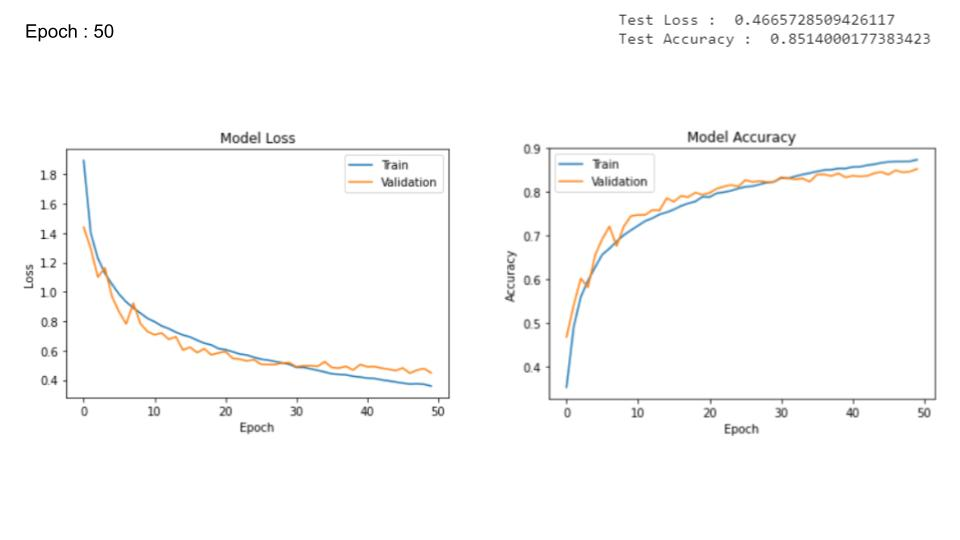

In [ ]:
plot_loss(history)

In [ ]:
plot_acc(history)

In [ ]:
model.summary()